# Avaliação

1. Crie uma função que recebe uma lista e retorna o valor máximo e mínimo da lista (não utilize a função max() e min()).
2. Crie uma função que recebe dois parâmetros (início e fim) e retorna uma lista com todos os valores pares entre ínicio e fim.
3. Acesse a nota de matemática em dc3 e altere para 3.

Para as questões 4 a 8 utilize o dataset 'water_potability.csv'. O dataset descreve características de uma amostra de água e na coluna 'potability' descreve se a água é ou não própria para consumo humano. Para iniciar a resolução das questões abaixo drope a coluna 'Unnamed: 0'.

4. Demonstre a correlação entre todas as colunas do dataset. Qual é a coluna com maior correlação positiva com 'potability'? Desconsidere a correlação com ela mesma (valor 1.0).
5. Crie uma série que descreve (em porcentagem) quanto cada coluna tem de valores nulos. Qual a coluna com maior porcentagem de valores nulos?
6. Crie uma coluna dentro do dataset que descreve se 'Turbidity' está acima ou abaixo da média.
7. Quantas amostras de água são potáveis e não potáveis, utilize a coluna criada na questão 6 como dimensão de análise.
8. Crie um dataframe onde o índice deve ser cada estado e com duas colunas. A primeira é a porcentagem de amostras não potáveis naquele estado e a segunda é a porcentagem de amostras potáveis naquele estado. Qual é o estado com a menor porcentagem de amostras de água potável?
9. Utlizando dados coletados da internet sobre a quantidade de habitantes de cada estado no ano 2020 responda. Qual estado, com populacao acima de 10 milhões de habitantes, tem a maior porcentagem de amostras de águas não potável?
10. Crie o dicionário dc_states contendo como chaves os nomes de cada estado e como valor uma lista contendo o zscore aplicado a coluna "Solids" de todas as amostras daquele respectivo estado. Passe para função violin_plot_states o dicionário e uma lista contendo 5 estados que gostaria de análisar. Faça uma análise sucinta do resultado do gráfico.

## 1. Crie uma função que recebe uma lista e retorna o valor máximo e mínimo da lista (não utilize a função max() e min()).

In [1]:
def getMaxMin(lista):
  lista.sort()
  valorMaximo = lista[-1]
  valorMinimo = lista[0]
  return valorMaximo, valorMinimo

valoresTeste = [9,1,0,-3,5,4]
getMaxMin(valoresTeste)

(9, -3)

## 2. Crie uma função que recebe dois parâmetros (início e fim) e retorna uma lista com todos os valores pares entre ínicio e fim.

In [2]:
def getEvenNumbersInBetween(inicio, fim):
  valoresPares = []
  for numeroPar in range(inicio, fim, 2):
    valoresPares.append(numeroPar)
  return valoresPares

getEvenNumbersInBetween(2,19)

[2, 4, 6, 8, 10, 12, 14, 16, 18]

## 3. Acesse a nota de matemática em dc3 e altere para 3.

In [3]:
dc3 = { 
   "turma":{ 
      "aluno":{ 
         "nome":"Joao",
         "notas":{ 
            "portugues":2,
            "matematica":9
         }
      }
   }
}


In [4]:
dc3['turma']['aluno']['notas']['matematica'] = 3
dc3

{'turma': {'aluno': {'nome': 'Joao',
   'notas': {'matematica': 3, 'portugues': 2}}}}

## 4 - 8. Para as questões 4 a 8 utilize o dataset 'water_potability.csv'. O dataset descreve características de uma amostra de água e na coluna 'potability' descreve se a água é ou não própria para consumo humano. Para iniciar a resolução das questões abaixo drope a coluna 'Unnamed: 0'.

In [55]:
import pandas as pd

data = pd.read_csv('water_potability.csv', sep = ';')
data = data.drop('Unnamed: 0', axis = 1)

In [56]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,state,sample_id
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,Pennsylvania,4b4962b9-fed5-492e-9d28-50d954937c3f
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0,Iowa,f1099b93-9195-4bd5-90b7-f0c191a74619
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0,Wisconsin,5bc660ce-c94c-4631-b69b-b937be4ab7bb
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,Maryland,fa912705-9dc8-4224-b5f8-f315f31070a6
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,Delaware,1761ae51-da0d-40af-bb86-50819ac3d1bc


## 4. Demonstre a correlação entre todas as colunas do dataset. Qual é a coluna com maior correlação positiva com 'potability'? Desconsidere a correlação com ela mesma (valor 1.0).

In [7]:
data.corrwith(data['Potability']).sort_values(ascending=False) 

# resposta = Solids

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.007130
Turbidity          0.001581
ph                -0.003556
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.023577
Organic_carbon    -0.030001
dtype: float64

## 5. Crie uma série que descreve (em porcentagem) quanto cada coluna tem de valores nulos. Qual a coluna com maior porcentagem de valores nulos?

In [8]:
data.isnull().mean().mul(100).sort_values(ascending=False) 

Sulfate            23.840049
ph                 14.987790
Trihalomethanes     4.945055
sample_id           0.000000
state               0.000000
Potability          0.000000
Turbidity           0.000000
Organic_carbon      0.000000
Conductivity        0.000000
Chloramines         0.000000
Solids              0.000000
Hardness            0.000000
dtype: float64

## 6. Crie uma coluna dentro do dataset que descreve se 'Turbidity' está acima ou abaixo da média.

In [9]:
data['TurbidityAbove'] = 0
data.loc[data['Turbidity'] > data['Turbidity'].mean(),['TurbidityAbove']] = 1

## 7. Quantas amostras de água são potáveis e não potáveis, utilize a coluna criada na questão 6 como dimensão de análise.

In [10]:
import numpy as np

quantidadeAmostrasPotaveis = data['TurbidityAbove'].loc[data['Potability'] == 1].sum()
quantidadeAmostrasNaoPotaveis = data['TurbidityAbove'].loc[data['Potability'] == 0].sum()

quantidadeAmostrasPotaveisTurbidityAcima = data['TurbidityAbove'].loc[(data['Potability'] == 1) &
                                                                      (data['TurbidityAbove'] == 1)].count()
quantidadeAmostrasNaoPotaveisTurbidityAcima = data['TurbidityAbove'].loc[(data['Potability'] == 0) &
                                                                         (data['TurbidityAbove'] == 1)].count()
quantidadeAmostrasPotaveisTurbidityAbaixo = data['TurbidityAbove'].loc[(data['Potability'] == 1) &
                                                                       (data['TurbidityAbove'] == 0)].count()
quantidadeAmostrasNaoPotaveisTurbidityAbaixo = data['TurbidityAbove'].loc[(data['Potability'] == 0) &
                                                                          (data['TurbidityAbove'] == 0)].count()

possibilidadesAmostras = ['Potaveis com Turbidity acima da média',
                          'Nao Potaveis com Turbidity acima da média',
                          'Potaveis com Turbidity abaixo da média',
                          'Nao Potaveis com Turbidity abaixo da média']
quantidadeAmostras = [quantidadeAmostrasPotaveisTurbidityAcima,
                      quantidadeAmostrasNaoPotaveisTurbidityAcima,
                      quantidadeAmostrasPotaveisTurbidityAbaixo,
                      quantidadeAmostrasNaoPotaveisTurbidityAbaixo]

tabelaAmostras = dict(zip(possibilidadesAmostras, quantidadeAmostras))
tabelaAmostras

{'Nao Potaveis com Turbidity abaixo da média': 1012,
 'Nao Potaveis com Turbidity acima da média': 986,
 'Potaveis com Turbidity abaixo da média': 648,
 'Potaveis com Turbidity acima da média': 630}

## 8. Crie um dataframe onde o índice deve ser cada estado e com duas colunas. A primeira é a porcentagem de amostras não potáveis naquele estado e a segunda é a porcentagem de amostras potáveis naquele estado. Qual é o estado com a menor porcentagem de amostras de água potável?

In [53]:
porcentagensPotavel = data.groupby('state')['Potability'].mean().sort_values(ascending=True)

porcentagemNaoPotavel = 1 - porcentagensPotavel.values
porcentagemPotavel = porcentagensPotavel.values
estados = porcentagensPotavel.keys()

tabelaEstadoPotavelPorcentagem = pd.DataFrame(
    {'Estado': estados,
     'Nao Potavel (%)': porcentagemNaoPotavel,
     'Potavel (%)': porcentagemPotavel
    })

tabelaEstadoPotavelPorcentagem.head()

,Estado,Nao Potavel (%),Potavel (%)
0,Minnesota,0.783333,0.216667
1,Vermont,0.712329,0.287671
2,Ohio,0.704918,0.295082
3,New York,0.701493,0.298507
4,Virginia,0.700000,0.300000


## 9. Utlizando dados coletados da internet sobre a quantidade de habitantes de cada estado no ano 2020 responda. Qual estado, com populacao acima de 10 milhões de habitantes, tem a maior porcentagem de amostras de águas não potável?

In [85]:
popData = pd.read_csv('nst-est2020-alldata.csv')

popData2020 = popData[['NAME', 'POPESTIMATE2020']]

estadoPotavelPopulacao = pd.merge(tabelaEstadoPotavelPorcentagem,
                                  popData2020,
                                  left_on = 'Estado', 
                                  right_on = 'NAME')

estadoPotavelPopulacao = estadoPotavelPopulacao.drop('NAME', axis = 1)

estadoPotavelPopulacao10M = estadoPotavelPopulacao.loc[estadoPotavelPopulacao['POPESTIMATE2020'] > 10000000]

estadoPotavelPopulacao10M.head(1)

,Estado,Nao Potavel (%),Potavel (%),POPESTIMATE2020
2,Ohio,0.704918,0.295082,11693217


## 10. Crie o dicionário dc_states contendo como chaves os nomes de cada estado e como valor uma lista contendo o zscore aplicado a coluna "Solids" de todas as amostras daquele respectivo estado. Passe para função violin_plot_states o dicionário e uma lista contendo 5 estados que gostaria de análisar. Faça uma análise sucinta do resultado do gráfico.

In [95]:
from scipy import stats

dc_states = data.groupby(['state'])['Solids'].apply(lambda grp: list(stats.zscore(grp.value_counts().index))).to_dict()
lista_estados = ['Florida', 'California', 'New York', 'Nevada', 'West Virginia']

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

def violin_plot_states(dc_states,lista_estados):
    f, ax = plt.subplots(1,1,figsize=(16,4))
    data_plot = pd.DataFrame.from_dict(dc_states,orient='index').T.melt().rename(columns={'variable':'state','value':'z_score'})
    states_plot = lista_estados
    sns.violinplot(x='state',y='z_score',data=data_plot[data_plot.state.isin(states_plot)])    
    ax.axhline(0,color='black',alpha=0.3)

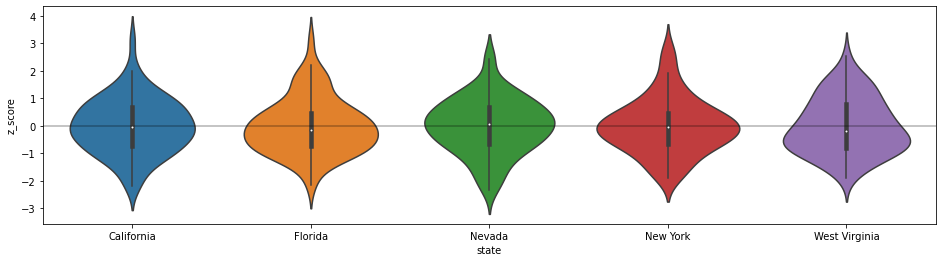

In [97]:
violin_plot_states(dc_states, lista_estados)